# Fishery dataset: Predicting weight with machine learning

In this project, we aim to create machine learning models to predict the live weight of caught of fish from a fishing operation. We will try to uncover important and predictive features of the fishing operations which will be used as parameters in our models. 

Our goal is to use create three supervised learning models which all predict the same outcome.

Our methodology is divided into three parts: 

**[Part A - Preprocessing](#pre_processing)**

This part starts by initializing python and all the libraries we use to process the data. Further we perform exploratory data analysis (EDA) to understand the features, remove anomalies in the dataset and perform potential normalizations.

**[Part B - Supervised learning](#part_b)**

**Part c - Unsupervised learning**

<a id="pre_processing"></a>
## Part A - Preprocessing

In this part we will analyse and prepare the data for our machine learning models.

### Step 0 - Importing libraries and reading the data

To start the project, we need to import the most common libraries we will use to explore the data. This includes pandas, numpy, matplotlib, seaborn, and sklearn.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
plt.style.use('ggplot')

### Step 1 - Reading the data

The data from the fishery reports are in the form of a CSV file. We read this file into a Pandas dataframe allowing for easy analysis and manipulation.

To ensure that the data was sucessfully loaded into the DataFrame, it can be useful to inspect the initial content. To do so we can use the `df.head(n)` function to display the first n rows and the column headers of the dataframe. 

*NOTE:* The filepath assumes that the csv file is located in a "Resources" directory in the project root directory. Please ensure that this directory and file is included prior to running the code. 

In [6]:
df = pd.read_csv('../Resources/elektronisk-rapportering-ers-2018-fangstmelding-dca-simple.csv', delimiter=';')
df.head(5)

,Melding ID,Meldingstidspunkt,Meldingsdato,Meldingsklokkeslett,Starttidspunkt,Startdato,Startklokkeslett,Startposisjon bredde,Startposisjon lengde,Hovedområde start (kode),...,Art - FDIR,Art - gruppe (kode),Art - gruppe,Rundvekt,Lengdegruppe (kode),Lengdegruppe,Bruttotonnasje 1969,Bruttotonnasje annen,Bredde,Fartøylengde
0,1497177,01.01.2018,01.01.2018,00:00,31.12.2017,31.12.2017,00:00,"-60,35","-46,133",NaN,...,Antarktisk krill,506.0,Antarktisk krill,706714.0,5.0,28 m og over,9432.0,NaN,"19,87","133,88"
1,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Hyse,202.0,Hyse,9594.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
2,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Torsk,201.0,Torsk,8510.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
3,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Blåkveite,301.0,Blåkveite,196.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
4,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Sei,203.0,Sei,134.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"


### Step 2 - Understanding the data

Now that we've loaded the data, we can start our analysis.

In [7]:
shape = df.shape
print("DataFrame contents")
print(f"Rows: {shape[0]}, Columns: {shape[1]}")

DataFrame contents
Rows: 305434, Columns: 45


In [8]:
print("DataFrame column names and their datatypes")
df.dtypes

DataFrame column names and their datatypes


Melding ID                    int64
Meldingstidspunkt            object
Meldingsdato                 object
Meldingsklokkeslett          object
Starttidspunkt               object
Startdato                    object
Startklokkeslett             object
Startposisjon bredde         object
Startposisjon lengde         object
Hovedområde start (kode)    float64
Hovedområde start            object
Lokasjon start (kode)       float64
Havdybde start                int64
Stopptidspunkt               object
Stoppdato                    object
Stoppklokkeslett             object
Varighet                      int64
Fangstår                      int64
Stopposisjon bredde          object
Stopposisjon lengde          object
Hovedområde stopp (kode)    float64
Hovedområde stopp            object
Lokasjon stopp (kode)       float64
Havdybde stopp                int64
Trekkavstand                float64
Redskap FAO (kode)           object
Redskap FAO                  object
Redskap FDIR (kode)         

In [9]:
df.describe()

,Melding ID,Hovedområde start (kode),Lokasjon start (kode),Havdybde start,Varighet,Fangstår,Hovedområde stopp (kode),Lokasjon stopp (kode),Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Hovedart - FDIR (kode),Art - FDIR (kode),Art - gruppe (kode),Rundvekt,Lengdegruppe (kode),Bruttotonnasje 1969,Bruttotonnasje annen
count,3.054340e+05,303433.000000,303433.000000,305434.000000,305434.000000,305434.000000,303472.000000,303472.000000,305434.000000,3.054100e+05,305246.000000,300456.000000,300452.000000,300452.000000,3.004560e+05,304750.000000,234005.000000,74774.000000
mean,1.658783e+06,14.463737,19.074712,-228.025292,537.095526,2017.999941,14.430415,18.883353,-229.084850,1.566397e+04,46.489746,1326.729934,1414.625914,259.746585,7.438208e+03,4.575032,1408.386975,186.172573
std,9.130738e+04,13.001244,18.469340,226.062493,2201.624688,0.007677,12.973150,18.361244,224.277365,9.033085e+04,13.534202,614.506560,633.188386,320.124913,4.281086e+04,0.692769,1148.384145,165.761157
min,1.497177e+06,0.000000,0.000000,-5388.000000,0.000000,2017.000000,0.000000,0.000000,-5388.000000,0.000000e+00,11.000000,412.000000,211.000000,101.000000,0.000000e+00,3.000000,104.000000,21.000000
25%,1.567228e+06,5.000000,7.000000,-273.000000,123.000000,2018.000000,5.000000,7.000000,-274.000000,2.533000e+03,32.000000,1022.000000,1022.000000,201.000000,6.400000e+01,4.000000,496.000000,87.000000
50%,1.674230e+06,8.000000,12.000000,-196.000000,296.000000,2018.000000,8.000000,12.000000,-198.000000,7.598000e+03,51.000000,1032.000000,1032.000000,203.000000,3.000000e+02,5.000000,1184.000000,149.000000
75%,1.735590e+06,20.000000,24.000000,-128.000000,494.000000,2018.000000,20.000000,24.000000,-127.000000,2.259900e+04,55.000000,1038.000000,2202.000000,302.000000,2.236000e+03,5.000000,2053.000000,236.000000
max,1.800291e+06,81.000000,87.000000,1220.000000,125534.000000,2018.000000,81.000000,87.000000,1616.000000,1.588863e+07,80.000000,6619.000000,6619.000000,9903.000000,1.100000e+06,5.000000,9432.000000,1147.000000


The dataset contains in total 305.434 rows of data, with 45 columns. Having a large dataset is beneficial for our machine learning purposes. Generally having more data gives us flexibility in choosing relevant features. It also grants us a larger training, testing, and validation datasets when building our models. This can result in higher accuracy, granted the data is well-prepared and have good quality.

# Step 2 - Data preparation

The dataset contains several columns which are unnecessary for our purpose. This includes the message report metadata, as well as duplicate columns which represents the same information in codes instead of words. We will now remove these columns.

In [10]:
df = df[[
    'Starttidspunkt','Startposisjon bredde', 'Startposisjon lengde', 'Hovedområde start',
    'Havdybde start', 'Stopptidspunkt', 'Varighet', 'Fangstår', 'Stopposisjon bredde', 
    'Stopposisjon lengde', 'Hovedområde stopp', 'Havdybde stopp', 'Trekkavstand', 'Redskap FDIR',
    'Art - FDIR', 'Art - gruppe', 'Rundvekt', 'Bruttotonnasje annen', 
    'Bruttotonnasje 1969', 'Bredde', 'Fartøylengde'
    ]].copy()

Several of the datatypes which are supposed to be continuous numeric values but are interpreted as objects. This is likely because the numbers are all using comma as decimal seperator, which is the standard representation in Norway. There are also several date and time object columns which needs to be converted to datetime.

In [11]:
df['Starttidspunkt'] = pd.to_datetime(df['Starttidspunkt'], format='mixed')
df['Stopptidspunkt'] = pd.to_datetime(df['Stopptidspunkt'], format='mixed')

df['Fartøylengde'] = pd.to_numeric(df['Fartøylengde'].str.replace(',', '.'))
df['Bredde'] = pd.to_numeric(df['Bredde'].str.replace(',', '.'))

df['Startposisjon bredde'] = pd.to_numeric(df['Startposisjon bredde'].str.replace(',', '.'))
df['Startposisjon lengde'] = pd.to_numeric(df['Startposisjon lengde'].str.replace(',', '.'))

### Missing data

Given our large dataset, it's highly likely that some of the data will be missing, corrupt or unwanted.

Empty cells are considered null values. The models in sci kit learn will give us an error when encountering these. Therefore, it is important to deal with null values during the pre-processing phase.
 
We must decide whether to drop the rows and columns containing null values, or to fill in the missing cells with another value (e.g. the mean)? The ladder approach is referred to as 'imputation'.

We use the `df.isna()` method on our dataframe to iterate each column checking for null values. `sum()` gives us the total for each column:

In [12]:
na_counts = df.isna().sum()
null_value_columns = na_counts[na_counts > 0]

print(f"Number of columns with no missing values: {len(na_counts[na_counts == 0])}")
null_value_columns

Number of columns with no missing values: 11


Hovedområde start         4124
Hovedområde stopp         4124
Trekkavstand                24
Redskap FDIR               188
Art - FDIR                4982
Art - gruppe              4982
Rundvekt                  4978
Bruttotonnasje annen    230660
Bruttotonnasje 1969      71429
Bredde                     684
dtype: int64

We observe that 10 of our remaining 21 columns contain missing values. Among these, the columns concerning "Bruttotonnasje" has over $2/3$ of rows with missing values. Because of this significant quantity of missing values, it will be challenging to get any useful information from them. Lets remove these. 
 
Afterwards we'll more closely review the other rows.  

In [13]:
df.drop(['Bruttotonnasje 1969', 'Bruttotonnasje annen'], axis=1, inplace=True)

In [14]:
rows_with_null = df.isna().any(axis=1)

# Count the number of rows with any null values
null_row_count = rows_with_null.sum()

print(f"Number of rows with any null values: {null_row_count}")
print(f"Percentage rows with null values: {null_row_count / df.shape[0] * 100:.2f} %")

Number of rows with any null values: 9631
Percentage rows with null values: 3.15 %


After dropping the "Bruttotonnasje" columns, the rows with null values are now only 3.15 % of the entire dataset. Removing these should have little effect on our models.

In [15]:
df = df.dropna()

## Step 3 - Feature Understanding

Here we will primarily use univariate analysis to understand the individual variables better.

To start off it's useful to draw histograms of all numeric variables. This will help us understand the variance of the data, help us identify outliers which can negatively affect our models.

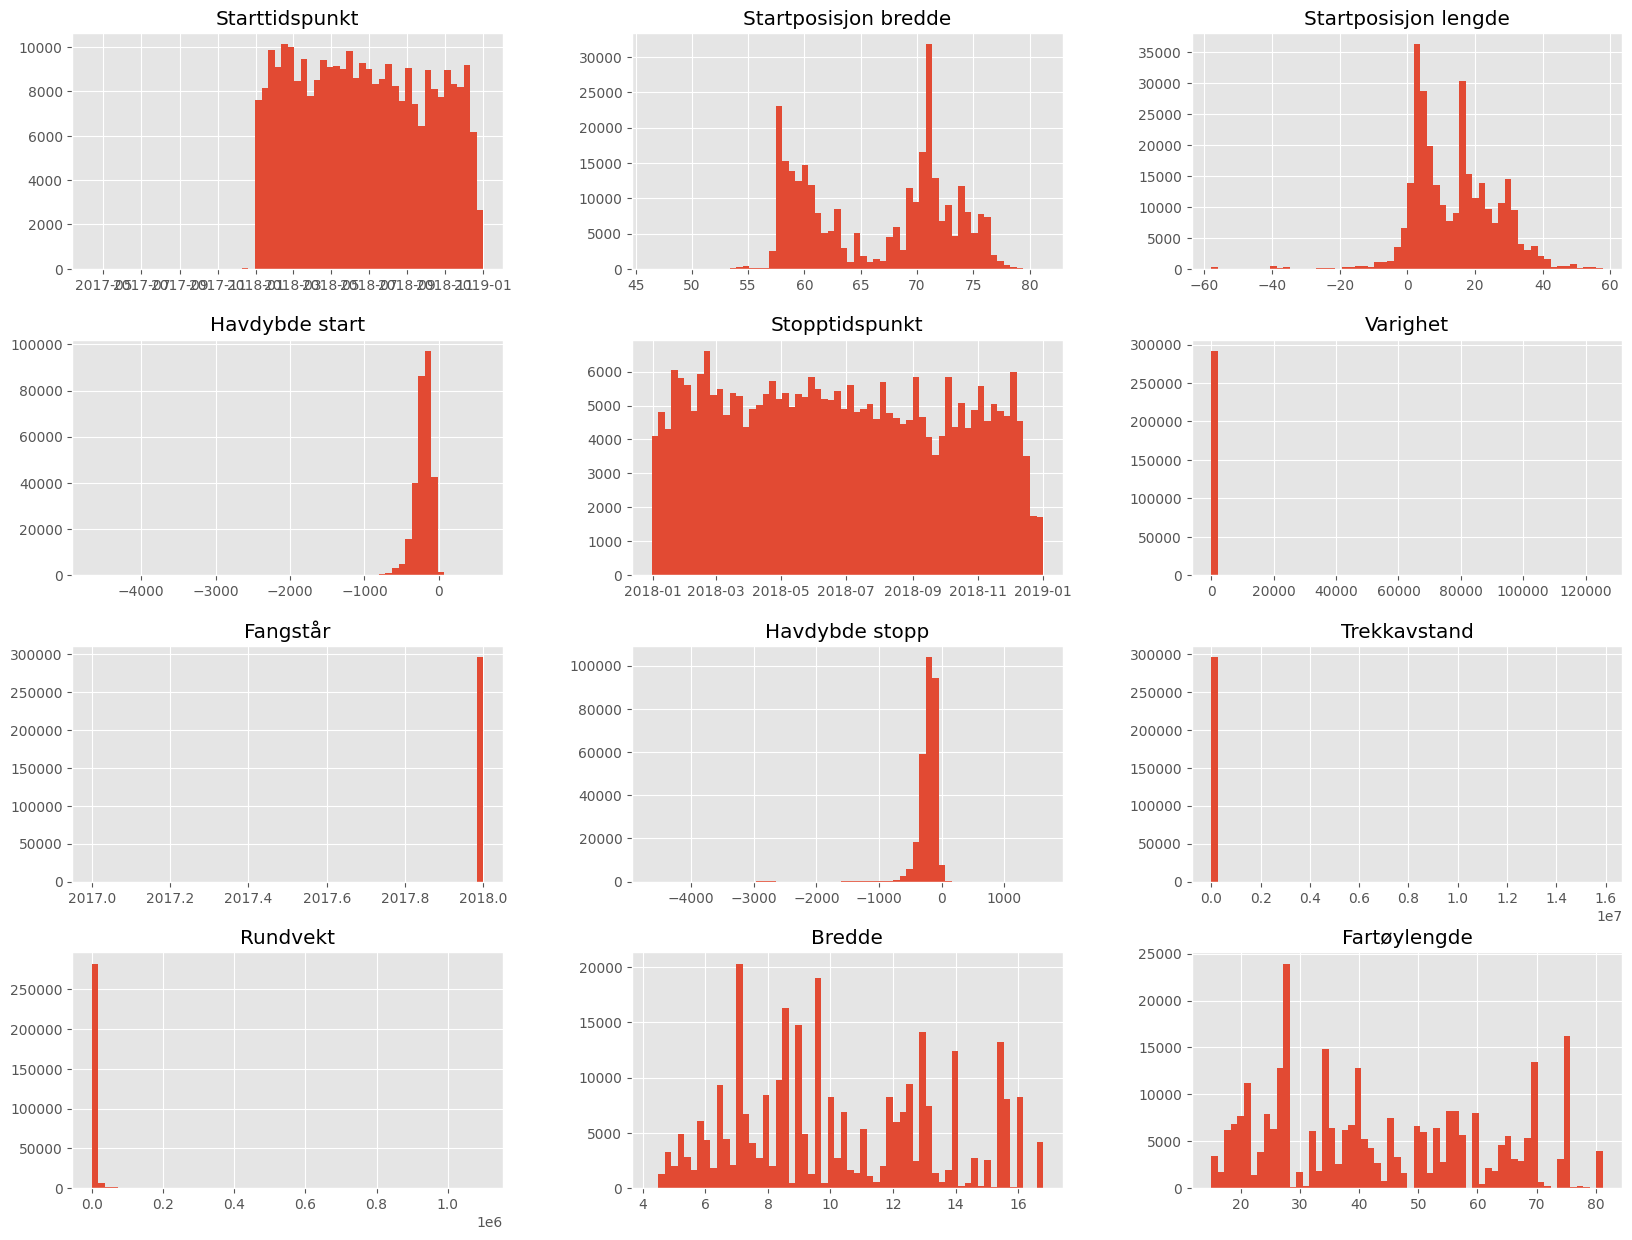

In [16]:
df.hist(bins=60, figsize=(20,15));plt.show()

In the resulting histogram its clear that some columns, such as "Varighet" and "Rundvekt" have outliers that can affect the quality of our models. To further analyse these variables a boxplot is useful.  

In [17]:
def draw_boxplots(variables):
    num_of_features = len(variables)
    
    num_of_columns = 5
    num_of_rows = int(np.ceil(num_of_features / num_of_columns))
    
    fig, axes = plt.subplots(nrows=num_of_rows, ncols=num_of_columns, figsize=(15, num_of_rows * num_of_columns))
    axes = axes.flatten()

    for i, col in enumerate(variables):
        df.boxplot(column=col, ax=axes[i])
    
    # Hide empty subplots when (number_of_features < num_of_rows * num_of_columns)
    for i in range(num_of_features, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

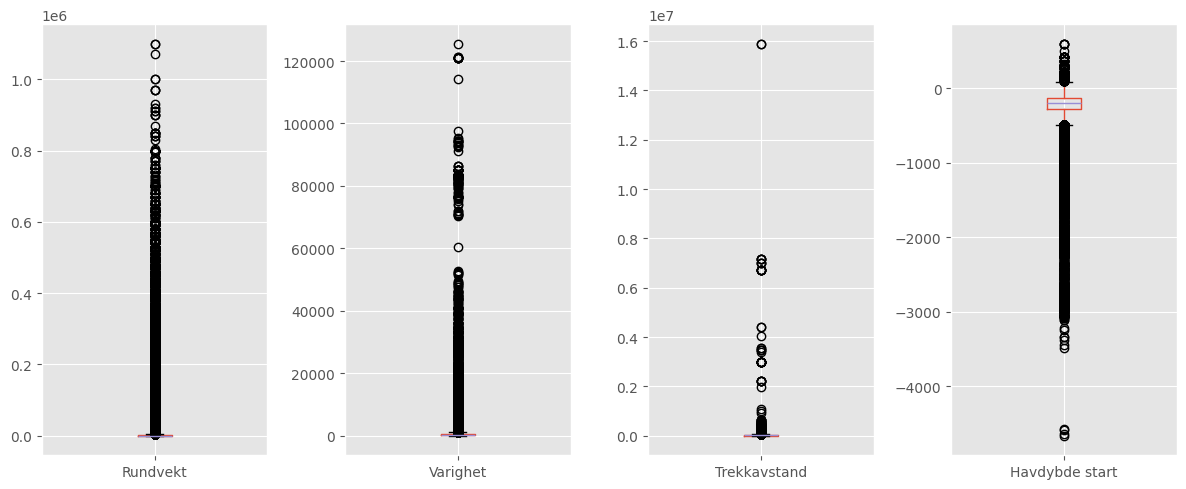

In [18]:
heavy_outliers = ['Rundvekt', 'Varighet', 'Trekkavstand', 'Havdybde start']
draw_boxplots(heavy_outliers)

Lets count the number of outliers

In [19]:
def find_outlier_value(feature : str):
    """
    Outlier is defined as 1.5 * IQR +- nearest quartile
    
    :param feature: name of the column in the DataFrame  
    :return: tuple (lower_bound, upper_bound) which represents the upper and lower bound of outliers in the DataFrame column. 
    """
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    lower_bound_extreme = q1 - 3 * iqr
    upper_bound_extreme = q3 + 3 * iqr
    
    return lower_bound, upper_bound, lower_bound_extreme, upper_bound_extreme

In [20]:
shape = []

for feature in heavy_outliers:
    lower, upper, lower_extreme, upper_extreme = find_outlier_value(feature)
    count = df.query(f'(`{feature}` < @lower) or (`{feature}` > @upper)').shape[0]
    count_extreme = df.query(f'(`{feature}` < @lower_extreme) or (`{feature}` > @upper_extreme)').shape[0]
    shape.append({'Feature': feature, 'Outliers': count, 'Extreme outliers': count_extreme})

outliers_df = pd.DataFrame(shape)
print(outliers_df)

          Feature  Outliers  Extreme outliers
0        Rundvekt     44106             30123
1        Varighet     24844              4132
2    Trekkavstand      5656               997
3  Havdybde start      9919              3290


We have many (extreme) outliers, specificly in the feature "Rundvekt". This may have a negative effect on our models, and we therefore need to take action.

Lets explore some normalization options.

In [21]:
_,_,_,extreme_upper = find_outlier_value('Rundvekt')

df['Rundvekt_clipped'] = df['Rundvekt'].clip(0, extreme_upper)

<Axes: >

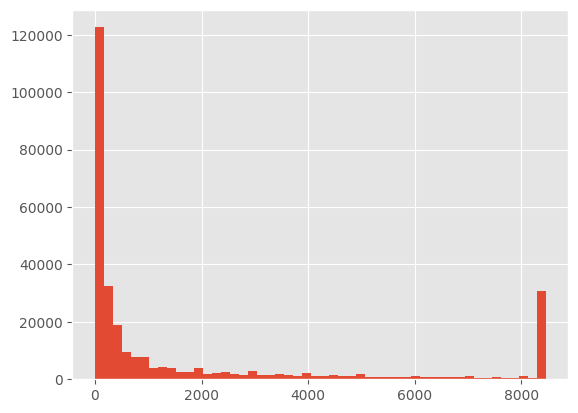

In [22]:
df['Rundvekt_clipped'].hist(bins=50)

The plot shows a distribution of datapoints where those containing a 'Rundvekt' value that exceeds the threshold set by our definition of an extreme outlier have been excluded.

We can create a dataframe where we exclude all rows where 'rundvekt'-values >= the extreme upper limit outliers. 

In [24]:
df_capped = df.query('Rundvekt < @extreme_upper')
df_capped

,Starttidspunkt,Startposisjon bredde,Startposisjon lengde,Hovedområde start,Havdybde start,Stopptidspunkt,Varighet,Fangstår,Stopposisjon bredde,Stopposisjon lengde,Hovedområde stopp,Havdybde stopp,Trekkavstand,Redskap FDIR,Art - FDIR,Art - gruppe,Rundvekt,Bredde,Fartøylengde,Rundvekt_clipped
3,2017-12-30 23:21:00,74.885,16.048,Bjørnøya,-335,2017-12-31 04:16:00,295,2017,"74,914","15,969",Bjørnøya,-334,3970.0,Bunntrål,Blåkveite,Blåkveite,196.0,12.6,56.8,196.0
4,2017-12-30 23:21:00,74.885,16.048,Bjørnøya,-335,2017-12-31 04:16:00,295,2017,"74,914","15,969",Bjørnøya,-334,3970.0,Bunntrål,Sei,Sei,134.0,12.6,56.8,134.0
6,2017-12-31 05:48:00,74.910,15.868,Bjørnøya,-403,2017-12-31 10:15:00,267,2017,"74,901","16,248",Bjørnøya,-277,11096.0,Bunntrål,Torsk,Torsk,6651.0,12.6,56.8,6651.0
7,2017-12-31 05:48:00,74.910,15.868,Bjørnøya,-403,2017-12-31 10:15:00,267,2017,"74,901","16,248",Bjørnøya,-277,11096.0,Bunntrål,Blåkveite,Blåkveite,130.0,12.6,56.8,130.0
8,2017-12-31 05:48:00,74.910,15.868,Bjørnøya,-403,2017-12-31 10:15:00,267,2017,"74,901","16,248",Bjørnøya,-277,11096.0,Bunntrål,Flekksteinbit,Steinbiter,82.0,12.6,56.8,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305429,2018-12-31 19:41:00,76.906,12.709,Vest-Spitsbergen,-349,2018-12-31 23:33:00,232,2018,"77,091","11,965",Vest-Spitsbergen,-273,27855.0,Bunntrål,Gråsteinbit,Steinbiter,145.0,12.6,57.3,145.0
305430,2018-12-31 19:41:00,76.906,12.709,Vest-Spitsbergen,-349,2018-12-31 23:33:00,232,2018,"77,091","11,965",Vest-Spitsbergen,-273,27855.0,Bunntrål,Uer (vanlig),Uer,136.0,12.6,57.3,136.0
305431,2018-12-31 19:41:00,76.906,12.709,Vest-Spitsbergen,-349,2018-12-31 23:33:00,232,2018,"77,091","11,965",Vest-Spitsbergen,-273,27855.0,Bunntrål,Flekksteinbit,Steinbiter,132.0,12.6,57.3,132.0
305432,2018-12-31 19:41:00,76.906,12.709,Vest-Spitsbergen,-349,2018-12-31 23:33:00,232,2018,"77,091","11,965",Vest-Spitsbergen,-273,27855.0,Bunntrål,Snabeluer,Uer,102.0,12.6,57.3,102.0


In order for us to better be able to use and analyze information currently contained in 'Starttidspunkt', we have to engage in some feature engineering. Right now, each datetime object is a unique, continuous value that makes it hard to spot potential patterns regarding dates and time. Dealing with only four seasons would be easier!

Lets create and apply a function that maps each datetime object to either 'Winter', 'Spring', 'Summer' or 'Fall':


In [25]:
df_capped['month'] = df_capped['Starttidspunkt'].dt.month
df_capped = df_capped.drop(['Starttidspunkt'], axis=1)

def map_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_capped['Season'] = df_capped['month'].apply(map_to_season)

df_capped = pd.get_dummies(df_capped, columns=['Season'])
df_capped = df_capped.drop(['month'], axis=1)

/var/folders/zd/6gz2dx9n4z55z1g2cr06p0c00000gn/T/ipykernel_49751/4183881441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_capped['month'] = df_capped['Starttidspunkt'].dt.month


## Step 4 : Feature relationship

Now that we have explored the individual variables by themselves, we will do a multivariate analysis.

In [26]:
grouped_stats = df.groupby('Art - FDIR')['Rundvekt'].describe()
print(grouped_stats)

                   count          mean           std    min       25%  \
Art - FDIR                                                              
Akkar              249.0     68.397590    182.252944    1.0     15.00   
Annen blekksprut     8.0     18.750000     20.865214    1.0      4.00   
Annen flatfisk       4.0    710.000000    876.584280    0.0      0.00   
Annen flyndre      416.0    112.548077    365.237454    1.0      6.75   
Annen makrell        1.0    180.000000           NaN  180.0    180.00   
...                  ...           ...           ...    ...       ...   
Vassild            280.0  52269.567857  48803.245625    0.0  17412.50   
Villsvinfisk         7.0     32.285714     24.260491    8.0     14.00   
Vågehval           293.0   1432.337884    596.344095    0.0   1040.00   
Ål                   2.0      1.000000      0.000000    1.0      1.00   
Øyepål            2209.0  11308.955636  13039.642244    0.0    200.00   

                      50%       75%       max  
Ar

In [27]:
sampled_df = df_capped.sample(n=50000)

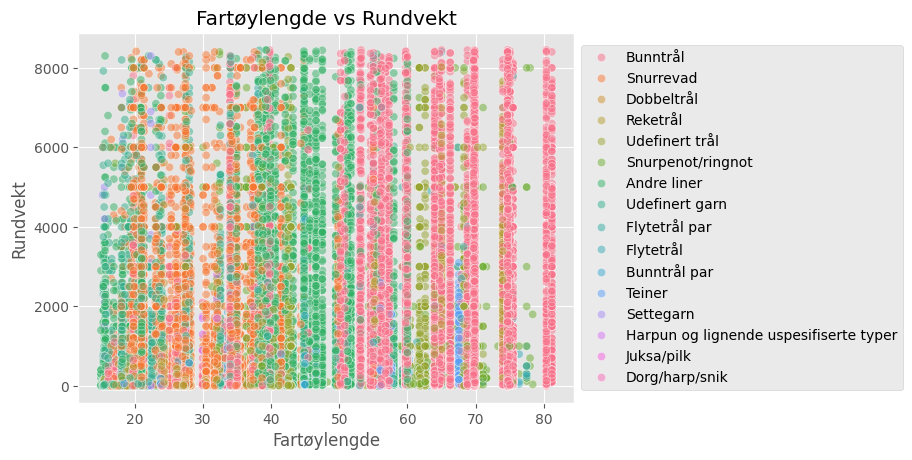

In [28]:
ax = sns.scatterplot(x='Fartøylengde',
                     y='Rundvekt',
                     hue='Redskap FDIR',
                     data=sampled_df,
                     alpha=0.5)
ax.set_title('Fartøylengde vs Rundvekt')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Plasserer legenden på siden
plt.show()

In [29]:
features = [ 'Fartøylengde', 'Rundvekt', 'Varighet','Trekkavstand', 'Havdybde start']


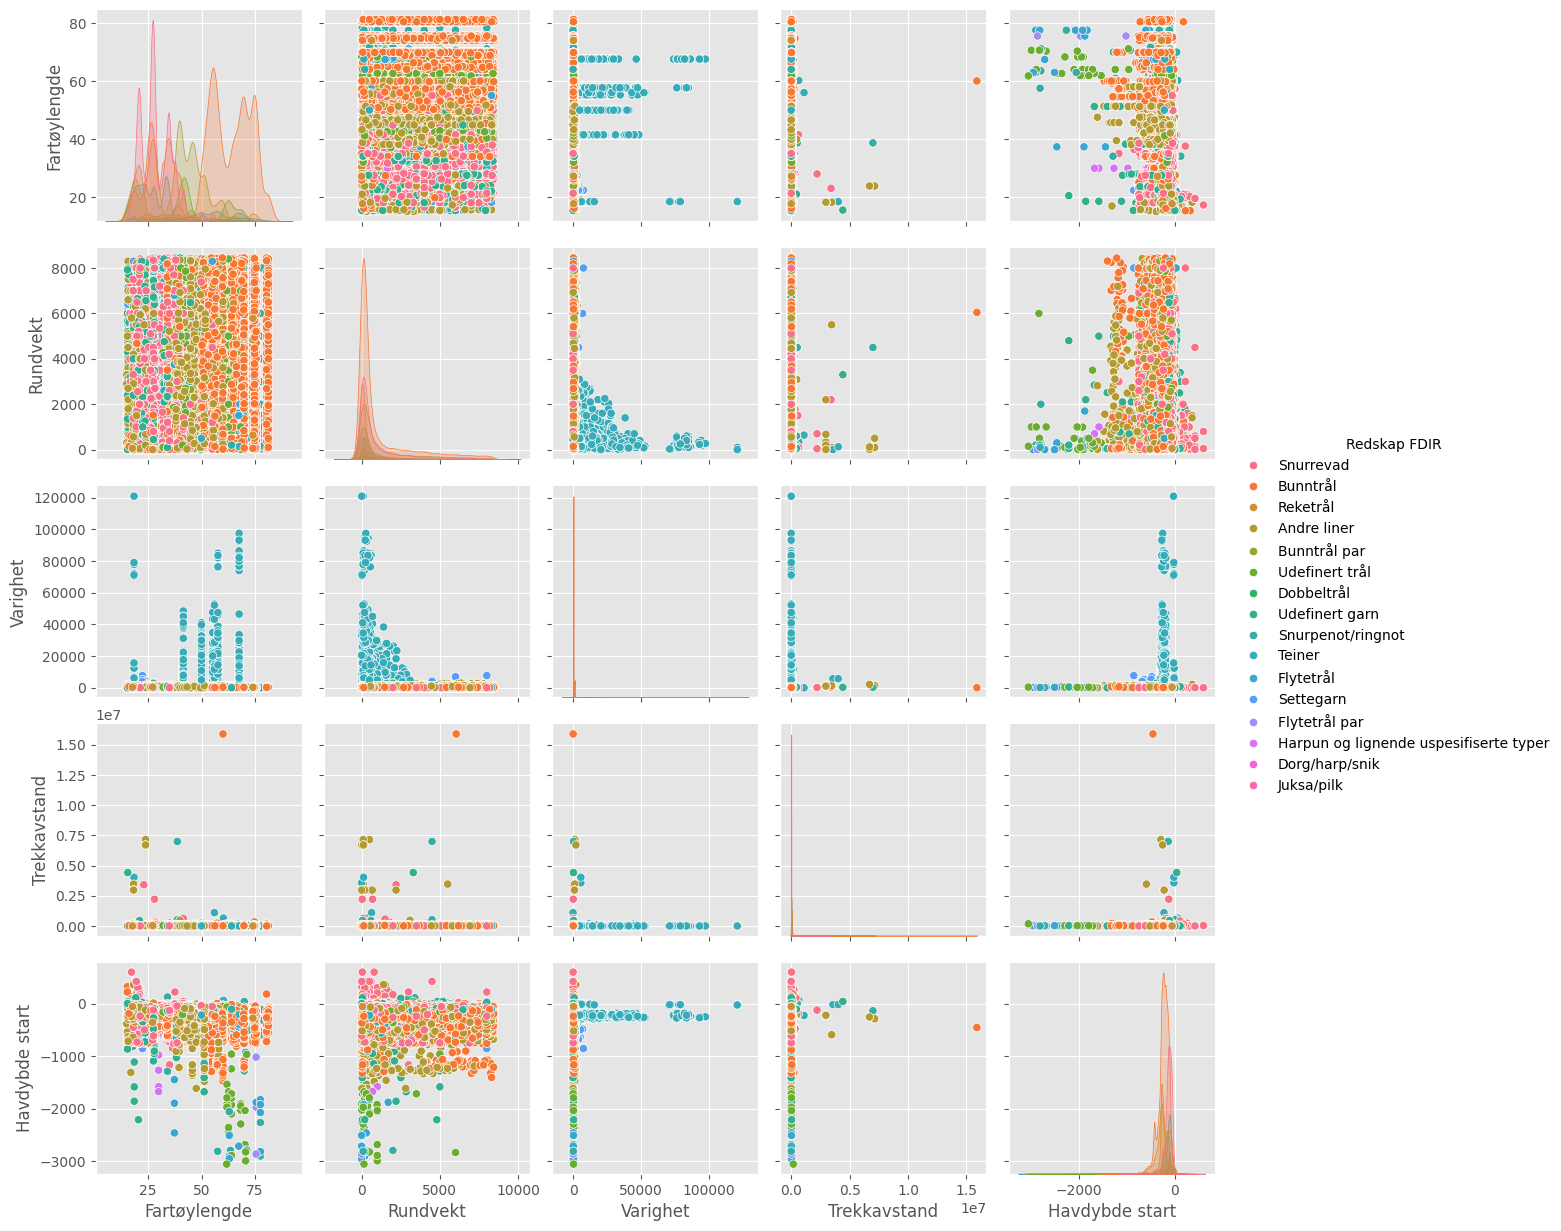

In [30]:
sampled_df = df_capped.sample(n=150000)
sns.pairplot(sampled_df, vars=features, hue='Redskap FDIR')
plt.show()

We can create a correlation matrix to explore the linear association between our variables

In [32]:
features = [ 'Season_Winter', 'Season_Spring','Season_Summer', 
            'Season_Fall', 'Fartøylengde', 'Rundvekt', 'Varighet',
            'Trekkavstand', 'Havdybde start']
df_corr = df_capped[features].corr()
df_corr

,Season_Winter,Season_Spring,Season_Summer,Season_Fall,Fartøylengde,Rundvekt,Varighet,Trekkavstand,Havdybde start
Season_Winter,1.000000,-0.334588,-0.327673,-0.312876,0.016121,0.008992,0.003060,0.011112,-0.038319
Season_Spring,-0.334588,1.000000,-0.354390,-0.338387,-0.023012,-0.006236,0.001659,-0.008213,-0.044269
Season_Summer,-0.327673,-0.354390,1.000000,-0.331393,-0.012375,-0.002311,-0.013046,0.004376,0.034013
Season_Fall,-0.312876,-0.338387,-0.331393,1.000000,0.020427,-0.000128,0.008595,-0.007035,0.049043
Fartøylengde,0.016121,-0.023012,-0.012375,0.020427,1.000000,0.209454,0.035000,0.006799,-0.210004
Rundvekt,0.008992,-0.006236,-0.002311,-0.000128,0.209454,1.000000,-0.030398,-0.011024,-0.056560
Varighet,0.003060,0.001659,-0.013046,0.008595,0.035000,-0.030398,1.000000,0.002645,-0.024937
Trekkavstand,0.011112,-0.008213,0.004376,-0.007035,0.006799,-0.011024,0.002645,1.000000,-0.030173
Havdybde start,-0.038319,-0.044269,0.034013,0.049043,-0.210004,-0.056560,-0.024937,-0.030173,1.000000


To improve readability, we turn it into a heatmap using the Seaborn library

<Axes: >

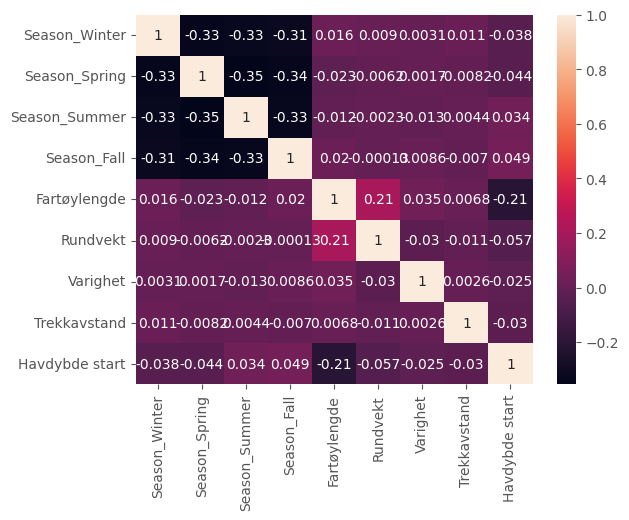

In [33]:
sns.heatmap(df_corr, annot=True)

While there are no values that stand out in a shocking way, we can clearly see that 'Fartøylengde' is somewhat correlated with both 'Rundvekt' and 'Havdybde_start'. While the numbers are a bit hard to read in the heatmap, we can also see from the dataframe that there seems to be an increase in distance ('Trekkavstand') during the winter compared to the other seasons. 
Information like this might not be perfectly relevant for our purposes in this task, but they do show how this type of analysis can prove useful in data science. 

If we were to discover values close to 1 or -1, it tells us that two of our features are extremely closely linked. Then we might not need both of them, as the value of one feature infers a certain value of the other. Issues might also arise if we were to scale only one of the features, as this hides the correlation from a machine learning model.

In [36]:
features = [ 'Season_Winter', 'Season_Spring','Season_Summer', 
            'Season_Fall', 'Fartøylengde', 'Rundvekt', 'Varighet',
            'Trekkavstand', 'Havdybde start', 'Art - FDIR', 'Hovedområde start']
df_n = df_capped[features].copy()

In [37]:
df_n = pd.get_dummies(df_n, columns=['Art - FDIR'])
# df_n = pd.get_dummies(df_n, columns=['Redskap FDIR'])
df_n = pd.get_dummies(df_n, columns=['Hovedområde start'])


<a id="part_b"></a>
## Part B - supervised learning

Now that we have pre-processed and analyzed our data, we are going to train three models using a machine learning technique called 'supervised learning'. As stated in the introduction, we want want our models to predict the live weight of caught of fish from a fishing operation. 
A model that generalizes well, will (hopefully) be able to predict live weight values based on the information it gets from the other features of our dataset. 
But in order to make a prediction about unlabeled data, it might be useful to let it train on a big chunk of labeled data. By 'labeled data' we mean data that contains the correct answer(label). This enables it to map certain feature values/patterns to specific values of live weight. 

## Grid search

Each model depends on specific parameters being set to be able before it can be used for training and predictions. Since knowing the optimal values for each parameter is nearly impossible without some tweeking, we will make us of SKlearn's GridSearchCv. Grid Search works like a for loop, and allows us to test several different values in search for the best parameter values. 

Grid search also perform cross validation


# Random Forest

A random forest is an ensemble of decision trees. Decision trees have a tendency to overfit and therefore generalize poorly to new data. The random forest deals with this by using several decision trees that are all created in a different, slightly random way. The predictions of a regression based forest are made by averaging the results produced by the individual decision trees.
Each feature is treated separately from the others in the individual nodes of the decision trees (if/else statements), so in random forests do not require much scaling or normalization.

Random forests tend to work well on big datasets, so it should not be a bad choice for our task. 

As each tree in a forest is generated randomly there is no need for grid search to tests different parameter values, but we use it anyway to utilize the cross validation functionality


In [34]:
def run_model(dataframe, target):
    y = dataframe[[target]]
    X = dataframe.drop([target], axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    rf = RandomForestRegressor(random_state=42)
    
    param_grid = {
        'n_estimators': [128]
    }

    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
    
    return grid_search.fit(X_train, y_train), X_test, y_test

In [35]:
for (d, t) in [(df_n, 'Rundvekt')]:
    
    model_result, X_test, y_test = run_model(d, t)
    
    print(t)
    
    best_params = model_result.best_params_
    print("Best parameters:", best_params)
    
    best_rf = model_result.best_estimator_
    
    predictions = best_rf.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print("MSE:", mse)
    
    r2 = r2_score(y_test, predictions)
    print("R^2-score:", r2)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklea

[CV] END ...................................n_estimators=128; total time= 4.7min
[CV] END ...................................n_estimators=128; total time= 4.7min
[CV] END ...................................n_estimators=128; total time= 4.7min
[CV] END ...................................n_estimators=128; total time= 4.7min
[CV] END ...................................n_estimators=128; total time= 4.7min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Rundvekt
Best parameters: {'n_estimators': 128}
MSE: 1250288.204476383
R^2-score: 0.5914664731846057


# KNN - regression

The predictions in KNN regressor are made by averaging the target values of the K nearest neighbors in the training set. The model needs every feature to be numeric, and it is sensitive to outliers. It calculates the square root of the sum of the squared differences between corresponding feature values to determine the distance between to data points. This is known as the Euclidean distance. 

We can specify how many neighbours (K) we want it to include.

In [38]:
df_Knn = df_n.copy()

In [39]:
X = df_Knn.drop(['Rundvekt'], axis=1)
y = df_Knn[['Rundvekt']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We can view scaling as a part of the model itself. A pipeline comes in handy for grouping the scaler and the regressor together. 
We can give the pipeline as an argument to our GridSearchCV along with the different parameters we want to optimize, our chosen scoring metrics, and the number of cross validation groups


In [38]:
knn_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('knn', KNeighborsRegressor())])

params = [{'knn__n_neighbors': [ 35, 50, 80],
         'knn__weights': ['uniform', 'distance']}]

gs_knn = GridSearchCV(knn_pipe,
                      param_grid=params,
                      scoring='neg_mean_squared_error',
                      cv=5,)
gs_knn.fit(X_train, y_train)
gs_knn.best_params_

{'knn__n_neighbors': 35, 'knn__weights': 'distance'}

In [39]:
predictions = gs_knn.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("MSE: {:.2f}".format(mse))
print("r2 score: {:.2f}".format(r2))

MSE: 1339918.49
r2 score: 0.56


# Neural network/deep learning

The type of neural network used in this task is an MLP (Multi Layered Perceptron). This is a feed forward network that uses back propagation to improve.

It consists of input nodes, output node(s) and possible 'hidden layers' of nodes in between them. Each node in one layer is connected to all the nodes in the next layer, and the values passed in changes for every layer they travel.

Weights and biases are added to the values as they travel from one layer to the next. The value recieved by a node is then used as input for an 'activation function' that determines new value to be passed on. 

Neural networks are typically trained using optimization algorithms like gradient descent, where the algorithm adjusts the model parameters (weights and biases) iteratively to minimize a loss function. 

We have chosen the optimization algorithm 'Adam' as our solver. The solver is used to update the model parameters during training. The choice of solver plays a crucial role in determining how weights and biases are updated

In [ ]:

mlp_pipe = Pipeline([
    ('mms', MinMaxScaler()),
    ('mlp', MLPRegressor())
])
mlp_params = {
    'mlp__activation': ['relu'],
    'mlp__hidden_layer_sizes': [(len(features), 4), (len(features), 8), (len(features), 12)], 
    'mlp__solver': ['adam'],
    'mlp__max_iter': [5, 20, 50, 100],
    'mlp__random_state': [42]
}

gs_mlp = GridSearchCV(
    estimator=mlp_pipe,
    param_grid=mlp_params,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

gs_mlp.fit(X_train, y_train)
mlp_y_pred = gs_mlp.predict(X_test)
mse = mean_squared_error(y_test, mlp_y_pred)
r2 = r2_score(y_test, mlp_y_pred)


In [2]:

print("MSE: {:.2f}".format(mse))
print("r2 score: {:.2f}".format(r2))
gs_mlp.best_params_

NameError: name 'gs_mlp' is not defined

## References

Müller, A. C. (2016). *Introduction to machine learning with Python : a guide for data scientists*. O'Reilly

Poole, D. L. (2017). *Artificial intelligence : foundations of computational agents* (2. ed.). Cambridge University Press


Citation in text:

(Müller, 2016, p. xxx)
(Poole, 2017, p. xxx)